In [2]:
from netCDF4 import Dataset
from netCDF4 import MFDataset
import _pickle as pickle
from matplotlib import pyplot
from matplotlib import contour
import numpy
import math
import pandas

In [3]:
ncfile = "C:/Users\Bram van Es/Dropbox/eScience/data_analysis/data/cabau_750steps/spifs/spifs_750_cabau.nc"
#ncfile = "/home/bramiozo/Dropbox/eScience/data_analysis/data/cabau_750steps/spifs/spifs_750_cabau.nc"
netcdf = Dataset(ncfile, "r") #, format="NETCDF4")

In [4]:
ncfile = "C:/Users\Bram van Es/Dropbox/eScience/data_analysis/data/cabau_fixed_forcings/spifs.nc"
#ncfile = "/home/bramiozo/Dropbox/eScience/data_analysis/data/cabau_fixed_forcings/spifs.nc"
netcdf_2 = Dataset(ncfile, "r") #, format="NETCDF4")

In [5]:
ds1 = netcdf[list(netcdf.groups.keys())[0]]

In [6]:
ds1.variables

OrderedDict([('time', <class 'netCDF4._netCDF4.Variable'>
              float32 time(time)
                  units: s
              path = /38062
              unlimited dimensions: time
              current shape = (11265,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('lwp', <class 'netCDF4._netCDF4.Variable'>
              float32 lwp(time, x, y)
              path = /38062
              unlimited dimensions: time
              current shape = (11265, 128, 128)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('rwp', <class 'netCDF4._netCDF4.Variable'>
              float32 rwp(time, x, y)
              path = /38062
              unlimited dimensions: time
              current shape = (11265, 128, 128)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('twp', <class 'netCDF4._netCDF4.Variable'>
              float32 twp(time, x, y)
              path = /38

In [7]:
ds2 = netcdf_2[list(netcdf_2.groups.keys())[0]]

In [8]:
time_series = ds2['time'][:]/3600/24
Time_series = netcdf_2['Time'][:]/3600/24

In [9]:
height_series = netcdf_2['zf'][:]
Height_series = ds2['Zf']


In [10]:
meas_heights = [100, 200, 300, 1000, 2000, 3000, 4000]
ref_heights = [numpy.argmin(numpy.abs(h-height_series)) for h in meas_heights]
Ref_heights = [numpy.argmin(numpy.abs(h-Height_series[1])) for h in meas_heights]

In [11]:
height_series[ref_heights]
Height_series[1][Ref_heights]

array([  109.08261108,   226.06544495,   300.48046875,  1048.12792969,
        2102.51318359,  2931.38378906,  3906.61499023], dtype=float32)

In [12]:
meas_times = numpy.linspace(0, 7, num=15) # in half days 
ref_times = [numpy.argmin(numpy.abs(t - Time_series)) for t in meas_times] 

In [13]:
E = len(Height_series[1])-1
B = numpy.argmin(numpy.abs(numpy.max(height_series)-Height_series[1]))
numSteps = E - B +1
oifs_range = list(numpy.linspace(E, B, numSteps).astype("int"))

In [14]:
diff_heights = numpy.diff(numpy.hstack((0, height_series)))
diff_Heights = []
for i in range(0, len(Time_series)):
    diff_Heights.append(-numpy.diff(numpy.hstack((Height_series[i], 0))))


In [15]:

def n_plots(ax, Xaxis, Ydata,xlab, ylab, labels):
    for i in range(0, len(Xaxis)):
        ax.plot(Xaxis[i], Ydata[i], label = labels[i])
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    lgd = ax.legend(loc=0, bbox_to_anchor=(1.2, 1), prop={'size': 14})
    return ax, lgd
    
    

def two_y_scales(ax1, xaxis1, xaxis2, data1, data2, c1, c2, ylab1, ylab2, xlab, labels):
    """

    Parameters
    ----------
    ax : axis
        Axis to put two scales on

    x-axis1 : array-like
        x-axis values for data set 1 
    
    x-axis2 : array-like
        x-axis values for data set 2

    data1: array-like
        Data for left hand scale

    data2 : array-like
        Data for right hand scale

    c1 : color
        Color for line 1

    c2 : color
        Color for line 2

    Returns
    -------
    ax : axis
        Original axis
    ax2 : axis
        New twin axis
    """
    ax2 = ax1.twinx()

    plt1, = ax1.plot(xaxis1, data1, '-+', color=c1, label = labels[0], )
    ax1.set_xlabel(xlab)
    ax1.set_ylabel(ylab1)
    plt2, =  ax2.plot(xaxis2, data2, '-+', color=c2, label = labels[1])
    ax2.set_ylabel(ylab2)
    
    lns = [plt1, plt2]
    labs = [l.get_label() for l in lns]
    ax1.grid('on')
    lgd = ax1.legend(lns, labs, bbox_to_anchor=(1.2, 1), prop={'size': 13})
    return ax1, ax2, lgd

def two_x_scales(ax1, xaxis1, xaxis2, data1, data2, c1, c2, xlab1, xlab2, ylab, labels):
    """

    Parameters
    ----------
    ax : axis
        Axis to put two scales on

    x-axis1 : array-like
        x-axis values for data set 1 
    
    x-axis2 : array-like
        x-axis values for data set 2

    data1: array-like
        Data for left hand scale

    data2 : array-like
        Data for right hand scale

    c1 : color
        Color for line 1

    c2 : color
        Color for line 2

    Returns
    -------
    ax : axis
        Original axis
    ax2 : axis
        New twin axis
    """
    ax2 = ax1.twiny()

    plt1, = ax1.plot(xaxis1, data1, '-+', color=c1, label = labels[0], )
    ax1.set_ylabel(ylab)
    ax1.set_xlabel(xlab1)
    plt2, = ax2.plot(xaxis2, data2, '-+', color=c2, label = labels[1])
    ax2.set_xlabel(xlab2)
    
    lns = [plot1, plot2]
    labs = [l.get_label() for l in lns]
    ax1.grid('on')
    lgd = ax1.legend(lns, labs, bbox_to_anchor=(1.2, 1), prop={'size': 13})
    
    return ax1, ax2, lgd

# Domain-wise averages

In [16]:
profile_agg_OIFS = ['U', 'V', 'THL', 'f_SH', 'f_U', 'f_V', 'QT', 'QL', 'f_T', 'f_A', 'A',
                                'Pf', 'Ph', 'QI', 'Tv', 'T', 'Zf', 'Zh', 'SH']
profile_agg_DALES = ['u', 'v', 'thl', 't_', 't', 'qt', 'ql', 'f_thl', 
                                'f_qt', 'f_u', 'f_v', 'presf']
xy_DALES = ['lwp', 'rwp', 'twp']


In [17]:
agg_time_series = {}
for varname in profile_agg_DALES:
    total_dales = []
    for i in range(1, len(Time_series)):
        total_dales.append({'timestep': i, 'total':sum(ds2[varname][i][:])/len(ds2[varname][i][:])})
    agg_time_series[varname]= {'ts': pandas.DataFrame(data=total_dales)}


In [18]:
for varname in profile_agg_OIFS:
    total_OIFS = []
    for i in range(1, len(Time_series)):
        total_OIFS.append({'timestep': i, 'total':sum(ds2[varname][i][oifs_range])/len(oifs_range)})
    agg_time_series[varname]= {'ts': pandas.DataFrame(data=total_OIFS)}

In [19]:
## plot tuples
profile_comparison = [('u', 'U'), ('v','V'), ('thl', 'THL'), ('qt','QT'), ('ql','QL'), 
                     ('t','T'), ('f_u', 'f_U'), ('f_v', 'f_V'), ('presf','Pf'), 
                      ('lwp','LWP'), ('twp', 'TWP')]

profile_comparison_DALES_dual= [('f_thl', 'thl'), ('f_qt', 'qt'), ('qt', 'thl')] # two vertical axes
profile_comparison_OIFS_mono = [('Pf', 'Ph')]
profile_comparison_OIFS_dual = [('f_A', 'A'), ('QT', 'THL')] # two vertical axes


## LWP 

In [20]:
total_lw_2 = []
total_LW_2 = []
R = 8.3144621
for i in range(1, len(Time_series)):
    total_lw_2.append({'timestep': i, 'total':sum(netcdf_2['38062/ql'][i][:]*(netcdf_2['38062/presf'][i][:]/netcdf_2['38062/t'][i][:]/R)*diff_heights[:])});
agg_time_series['lwp'] = {'ts': pandas.DataFrame(data=total_lw_2)}

for i in range(1, len(Time_series)):
    total_LW_2.append({'timestep': i, 'total':sum(netcdf_2['38062/QL'][i][oifs_range]*(netcdf_2['38062/Pf'][i][oifs_range]/netcdf_2['38062/T'][i][oifs_range]/R)*diff_Heights[i][oifs_range])});
agg_time_series['LWP']  =  {'ts': pandas.DataFrame(data=total_LW_2)}

c:\users\bramva~1\envs\worken~1\lib\site-packages\numpy\ma\core.py:1046: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


## TWP 

In [21]:
total_tw_2 = []
total_TW_2 = []
R = 8.3144621
for i in range(1, len(Time_series)):
    total_tw_2.append({'timestep': i, 'total':sum(netcdf_2['38062/qt'][i][:]*(netcdf_2['38062/presf'][i][:]/netcdf_2['38062/t'][i][:]/R)*diff_heights[:])});
agg_time_series['twp'] = {'ts': pandas.DataFrame(data=total_tw_2)}

for i in range(1, len(Time_series)):
    total_TW_2.append({'timestep': i, 'total':sum(netcdf_2['38062/QT'][i][oifs_range]*(netcdf_2['38062/Pf'][i][oifs_range]/netcdf_2['38062/T'][i][oifs_range]/R)*diff_Heights[i][oifs_range])});
agg_time_series['TWP'] = {'ts': pandas.DataFrame(data=total_TW_2)}


c:\users\bramva~1\envs\worken~1\lib\site-packages\numpy\ma\core.py:1046: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


In [155]:
try:
    total_num_xy_cell = numpy.shape(ds2['lwp'][1,:,:])[0]**2
    total_lw = []
    for i in range(1, len(time_series)):
        total_lw.append({'time':i, 'lw':sum(sum(ds2['lwp'][i,:,:]))/total_num_xy_cell})
    total_lw_df =pandas.DataFrame(data=total_lw)
    total_rw = []
    for i in range(1, len(time_series)):
        total_rw.append({'time':i, 'rw':sum(sum(ds2['rwp'][i,:,:]))/total_num_xy_cell})
    total_rw_df =pandas.DataFrame(data=total_rw)
    total_tw = []
    for i in range(1, len(time_series)):
        total_tw.append({'time':i, 'tw':sum(sum(ds2['twp'][i,:,:]))/total_num_xy_cell})
    total_tw_df =pandas.DataFrame(data=total_tw)
except IndexError as e:
    print('index error')

index error


# Plots
## time evolution of aggregate profile values

c:\users\bramva~1\envs\worken~1\lib\site-packages\numpy\core\numeric.py:531: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


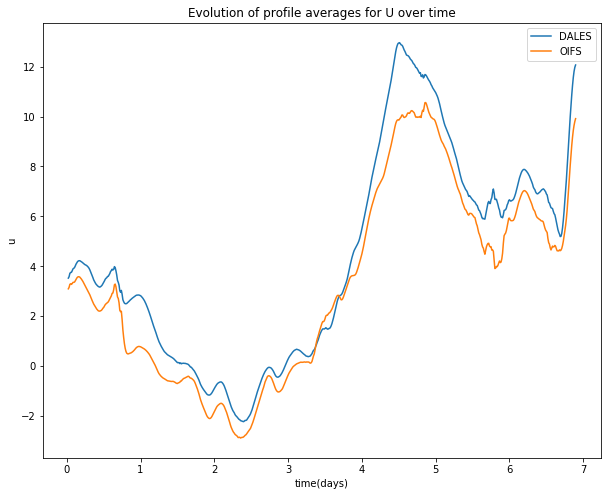

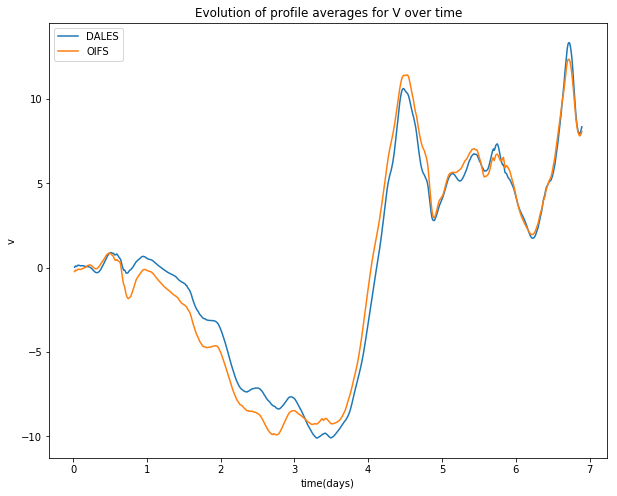

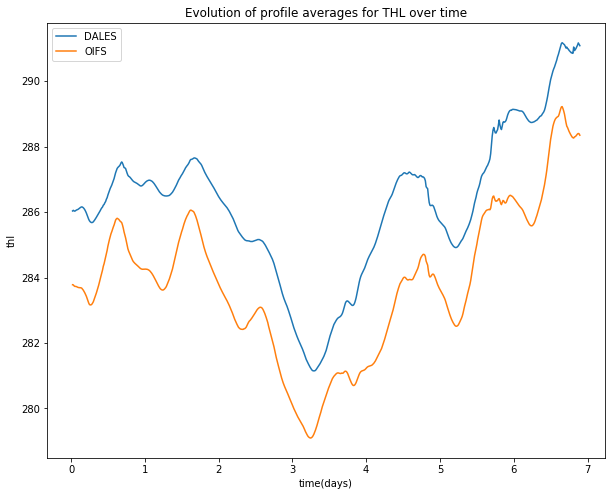

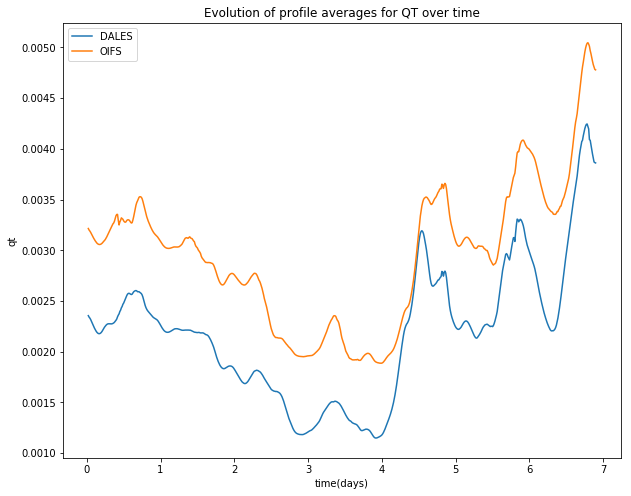

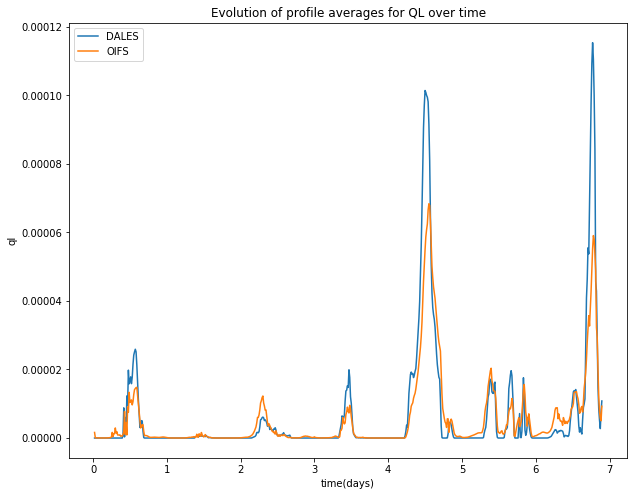

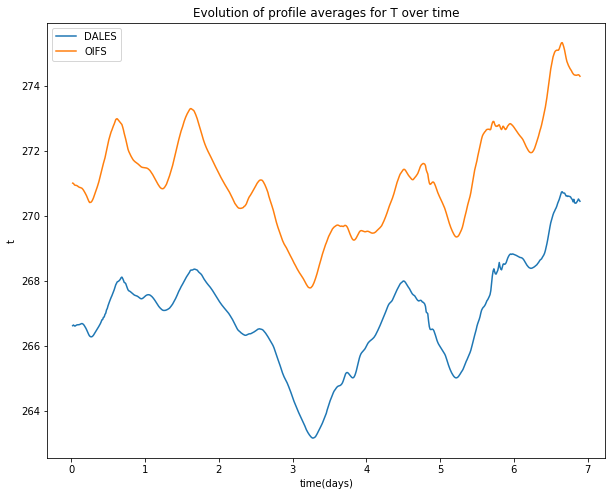

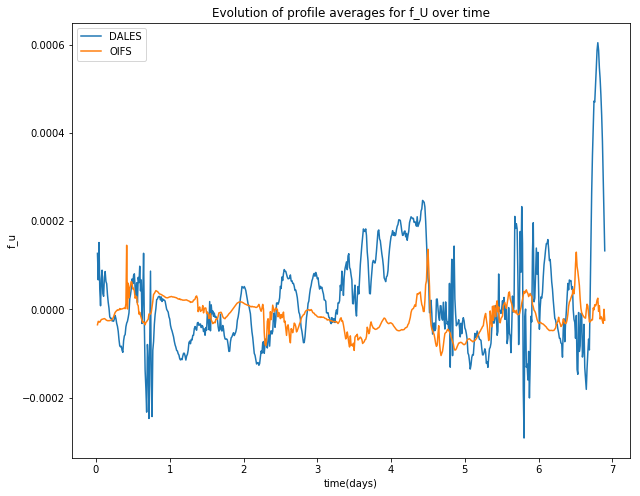

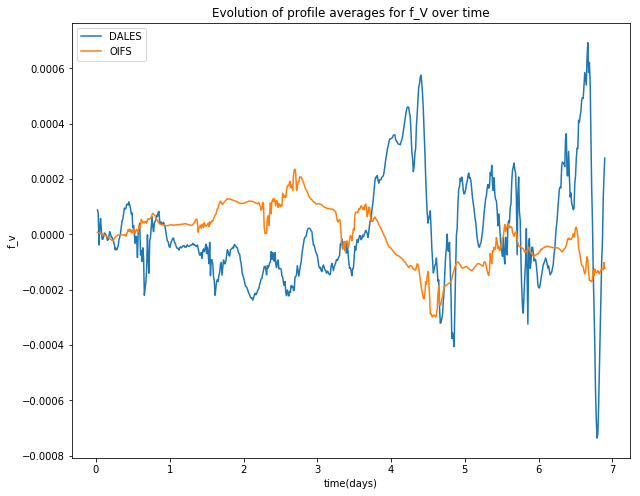

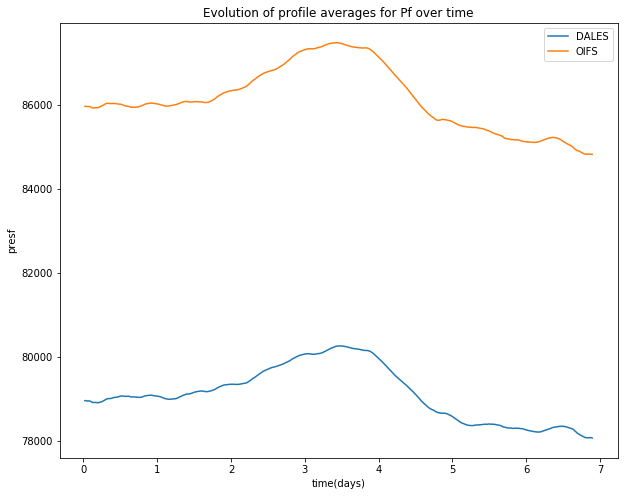

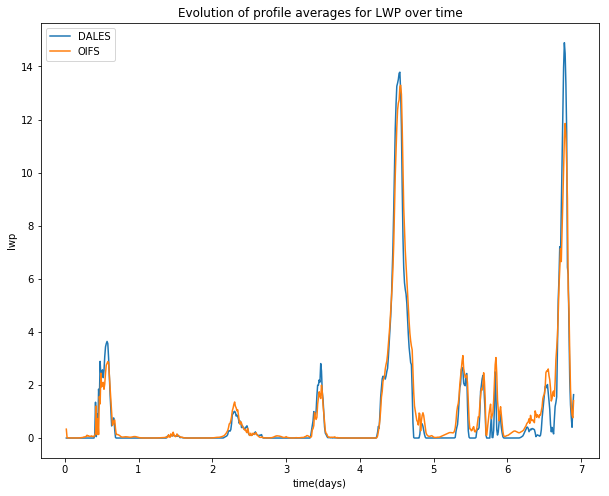

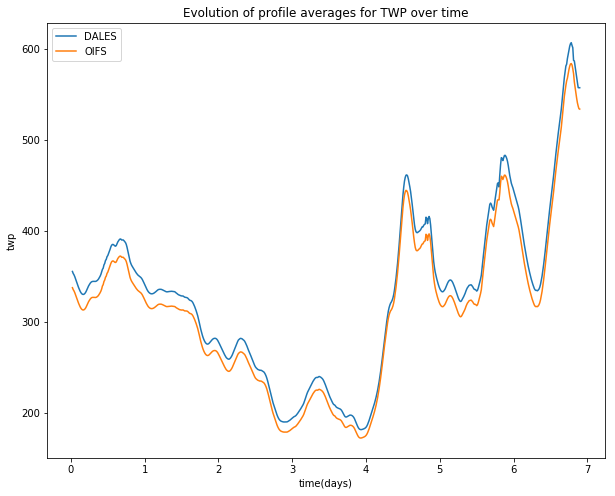

In [235]:
fig_size = (10, 8)
dpi_ = 300
for plot_tuple in profile_comparison:
    figure = pyplot.figure(figsize=fig_size)
    pyplot.plot(Time_series[1:], agg_time_series[plot_tuple[0]]['ts']['total'], label = 'DALES')
    pyplot.plot(Time_series[1:], agg_time_series[plot_tuple[1]]['ts']['total'], label = 'OIFS')
    pyplot.xlabel("time(days)")
    pyplot.ylabel(plot_tuple[0])
    pyplot.title('Evolution of profile averages for {} over time'.format(plot_tuple[1]))
    pyplot.legend()
    pyplot.savefig("output/DALES_OIFS_{}_total_timeseries.png".format(plot_tuple[1]), dpi = dpi_ )
    pyplot.show()
    pyplot.close()
    

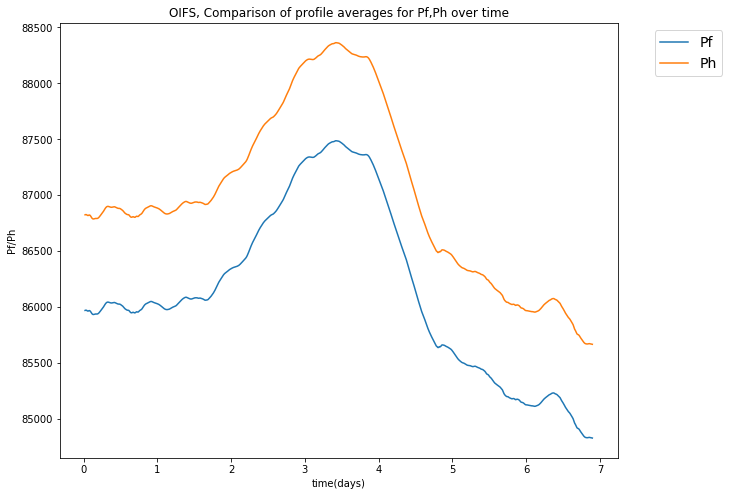

In [259]:
# OIFS mono plots
fig_size = (10, 8)
dpi_ = 300

for plot_tuple in profile_comparison_OIFS_mono:
    fig, ax = pyplot.subplots(figsize=fig_size)
    Xdata = []
    Ydata = []
    labels = []
    for var in plot_tuple:
        Xdata.append(Time_series[1:])
        Ydata.append(agg_time_series[var]['ts']['total'])
        labels.append(var)
    
    ax1, lgd = n_plots(ax, Xdata, Ydata, "time(days)", "/".join(labels), labels)
    pyplot.title('OIFS, Comparison of profile averages for {} over time'.format(",".join(labels)))
    pyplot.savefig("output/DALES_OIFS_{}_total_timeseries.png".format(plot_tuple[1]), 
                   dpi = dpi_, bbox_extra_artists=(lgd,), bbox_inches='tight')
    pyplot.show()
    pyplot.close()
    

c:\users\bramva~1\envs\worken~1\lib\site-packages\numpy\core\numeric.py:531: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


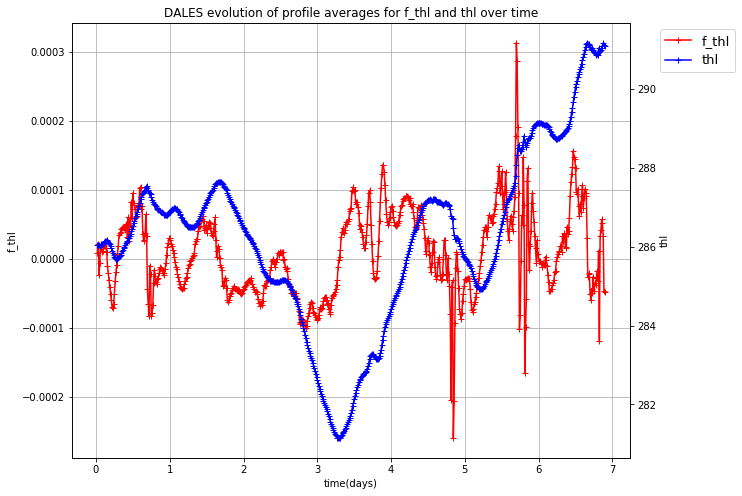

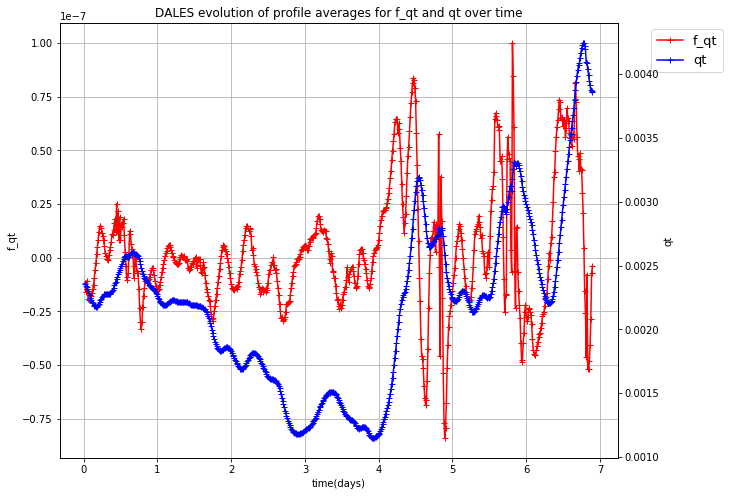

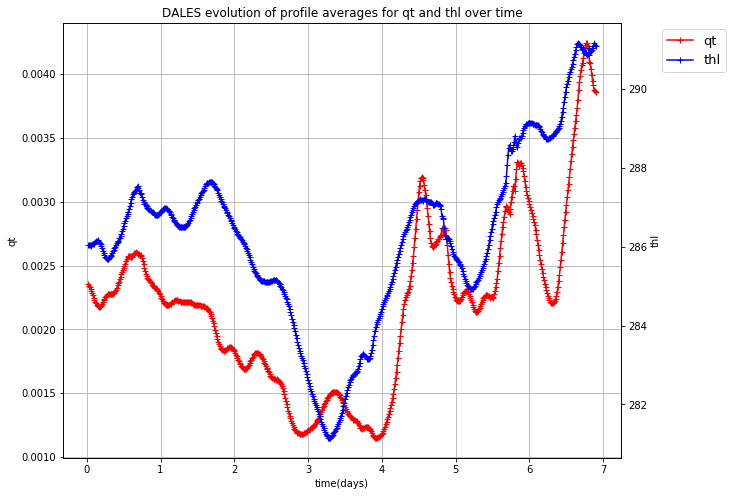

In [271]:
# DALES dual plots
fig_size = (10, 8)
dpi_ = 300
for plot_tuple in profile_comparison_DALES_dual:
    fig, ax = pyplot.subplots(figsize=fig_size)
    ax1, ax2, lgd = two_y_scales(ax, Time_series[1:], Time_series[1:], 
                            agg_time_series[plot_tuple[0]]['ts']['total'],
                            agg_time_series[plot_tuple[1]]['ts']['total'], 
                              'r', 'b', plot_tuple[0], plot_tuple[1], 
                            'time(days)', labels=[plot_tuple[0], plot_tuple[1]])
    pyplot.title('DALES evolution of profile averages for {} and {} over time'.format(plot_tuple[0], plot_tuple[1]))
    pyplot.savefig("output/DALES_dual_{}-{}_total_timeseries.png".format(plot_tuple[0], plot_tuple[1]), 
                   dpi = dpi_, bbox_extra_artists=(lgd,), bbox_inches='tight')
    pyplot.show()
    pyplot.close()
    


c:\users\bramva~1\envs\worken~1\lib\site-packages\numpy\core\numeric.py:531: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


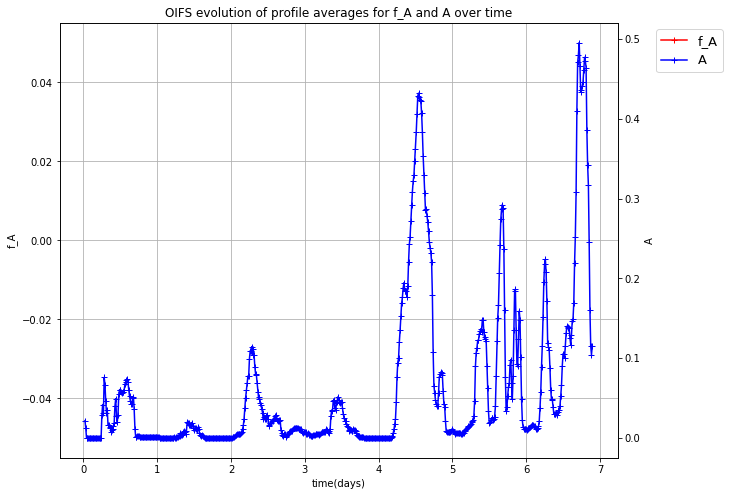

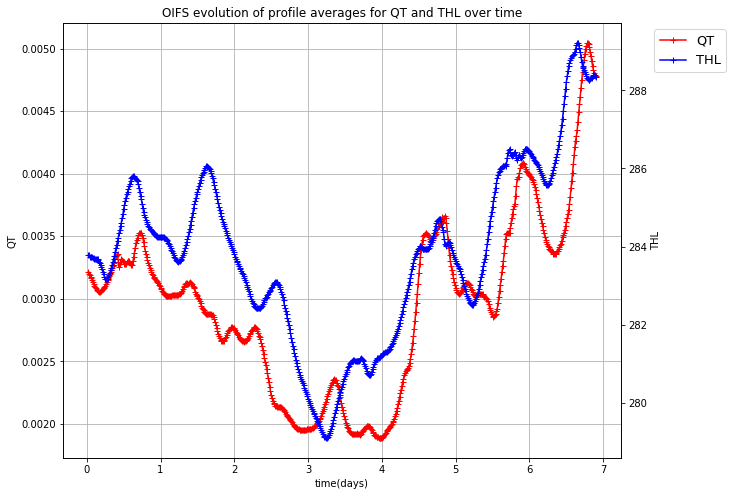

In [272]:
# OIFS dual plots
fig_size = (10, 8)
dpi_ = 300
for plot_tuple in profile_comparison_OIFS_dual:
    fig, ax = pyplot.subplots(figsize=fig_size)
    ax1, ax2, lgd = two_y_scales(ax, Time_series[1:], Time_series[1:], 
                            agg_time_series[plot_tuple[0]]['ts']['total'],
                            agg_time_series[plot_tuple[1]]['ts']['total'], 
                              'r', 'b', plot_tuple[0], plot_tuple[1], 
                            'time(days)', labels=[plot_tuple[0], plot_tuple[1]])
    pyplot.title('OIFS evolution of profile averages for {} and {} over time'.format(plot_tuple[0], plot_tuple[1]))
    pyplot.savefig("output/OIFS_dual_{}_total_timeseries.png".format(plot_tuple[1]), 
                   dpi = dpi_, bbox_extra_artists=(lgd,), bbox_inches='tight')
    pyplot.show()
    pyplot.close()

## time evolution of profile values at specific heights, two y-axes for different units

In [ ]:
# DALES 
fig_size = (10, 8)
dpi_ = 300

for var in profile_agg_DALES:
    fig, ax = pyplot.subplots(figsize=fig_size)
    Xdata = []
    Ydata = []
    labels = []
    print(var)
    for k in ref_heights:
        Xdata.append(Time_series[1:])
        Ydata.append(ds2[var][1:,k])
        labels.append(str(height_series[k])+"(m)")
    
    ax1, lgd = n_plots(ax, Xdata, Ydata, "time(days)", var, labels)
    pyplot.title('DALES, Height-based comparison of profile averages over time')
    pyplot.savefig("output/DALES_{}_levels_timeseries.png".format(var), 
                   dpi = dpi_, bbox_extra_artists=(lgd,), bbox_inches='tight')
    pyplot.show()
    pyplot.close()

In [ ]:
# OIFS 
fig_size = (10, 8)
dpi_ = 300

for var in profile_agg_OIFS:
    fig, ax = pyplot.subplots(figsize=fig_size)
    Xdata = []
    Ydata = []
    labels = []
    for k in Ref_heights:
        Xdata.append(Time_series[1:])
        Ydata.append(ds2[var][1:,k])
        labels.append(str(Height_series[1, k])+"(m)")
    
    ax1, lgd = n_plots(ax, Xdata, Ydata, "time(days)", var, labels)
    pyplot.title('OIFS, Height-based comparison of profile averages over time')
    pyplot.savefig("output/OIFS_{}_levels_timeseries.png".format(var), 
                   dpi = dpi_, bbox_extra_artists=(lgd,), bbox_inches='tight')
    pyplot.show()
    pyplot.close()

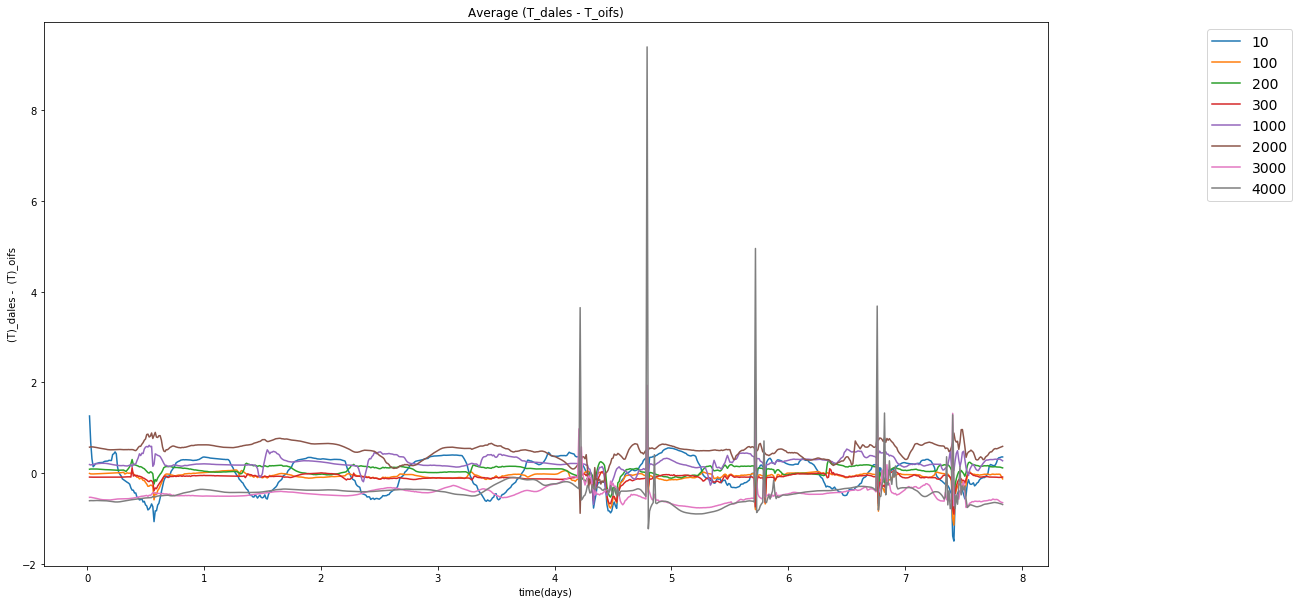

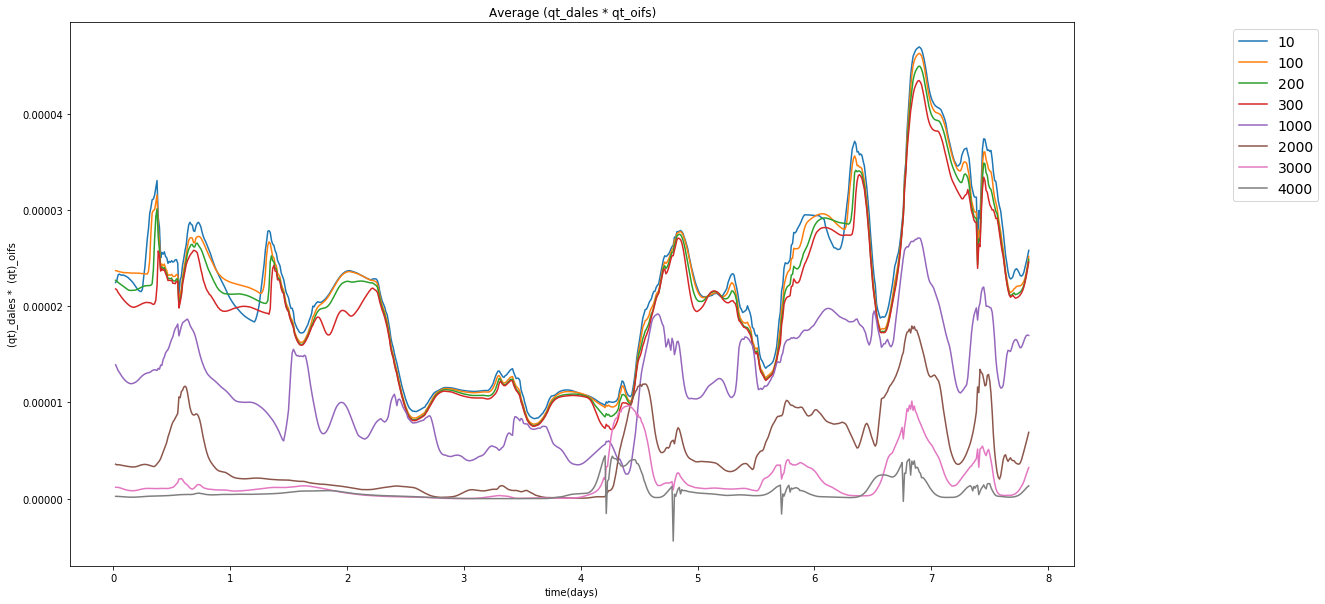

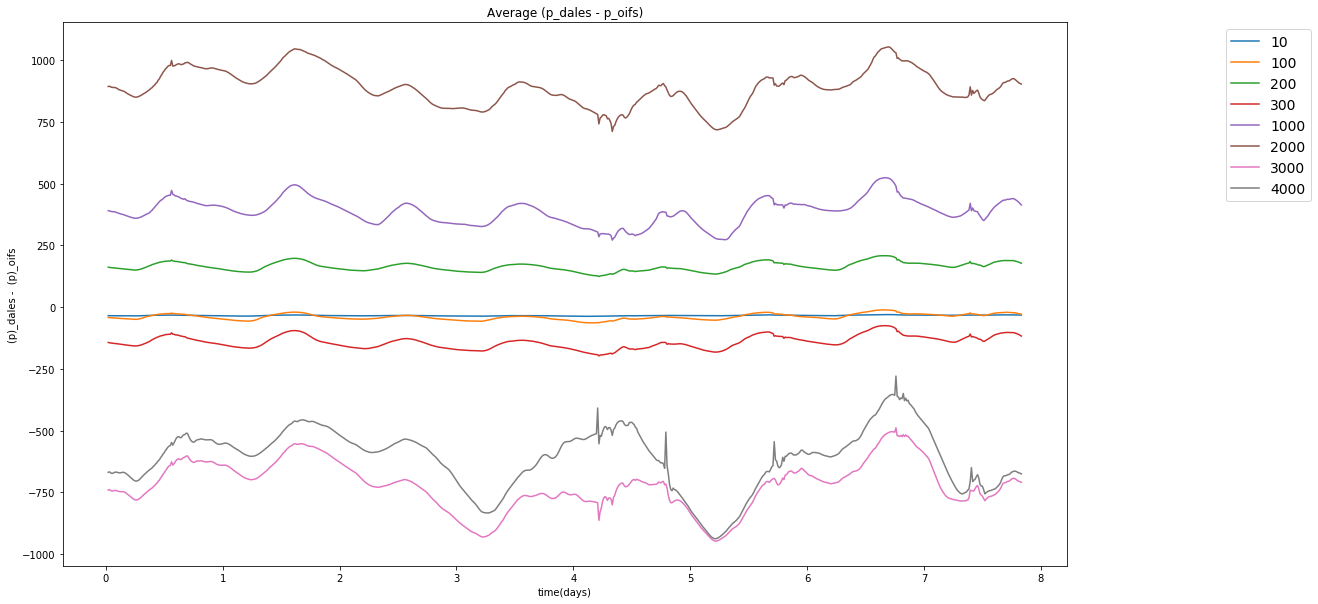

In [81]:
fig, ax = pyplot.subplots(figsize=(18, 10))
Xdata = []
Ydata = []
for i in range(0, len(ref_heights)):
    kDALES = ref_heights[i]
    kOIFS = Ref_heights[i]
    Xdata.append(Time_series[1:752])
    Ydata.append(numpy.array(list(netcdf['38062/t'][1:752, kDALES])) - numpy.array(list(netcdf['38062/T'][1:752, kOIFS])))

    
ax1 = n_plots(ax, Xdata, Ydata, 
                   "time(days)", "(T)_dales -  (T)_oifs", 
                    ["10", "100", "200", "300", "1000", "2000", "3000", "4000"])
#pyplot.xlim([4,5])
#pyplot.ylim([0, 1e-6])
pyplot.title("Average (T_dales - T_oifs)")
pyplot.show()

fig, ax = pyplot.subplots(figsize=(18, 10))
Xdata = []
Ydata = []
for i in range(0, len(ref_heights)):
    kDALES = ref_heights[i]
    kOIFS = Ref_heights[i]
    Xdata.append(Time_series[1:752])
    Ydata.append(numpy.array(list(netcdf['38062/qt'][1:752, kDALES])) * numpy.array(list(netcdf['38062/QT'][1:752, kOIFS])))

    
ax1 = n_plots(ax, Xdata, Ydata, 
                   "time(days)", "(qt)_dales *  (qt)_oifs", 
                    ["10", "100", "200", "300", "1000", "2000", "3000", "4000"])
#pyplot.xlim([4,5])
#pyplot.ylim([-1e-5, 1e-5])
pyplot.title("Average (qt_dales * qt_oifs)")
pyplot.show()

fig, ax = pyplot.subplots(figsize=(18, 10))
Xdata = []
Ydata = []
for i in range(0, len(ref_heights)):
    kDALES = ref_heights[i]
    kOIFS = Ref_heights[i]
    Xdata.append(Time_series[1:752])
    Ydata.append(numpy.array(list(netcdf['38062/presf'][1:752, kDALES])) - numpy.array(list(netcdf['38062/Pf'][1:752, kOIFS])))

    
ax1 = n_plots(ax, Xdata, Ydata, 
                   "time(days)", "(p)_dales -  (p)_oifs", 
                    ["10", "100", "200", "300", "1000", "2000", "3000", "4000"])
#pyplot.xlim([4,5])
#pyplot.ylim([0, 1e-6])
pyplot.title("Average (p_dales - p_oifs)")
pyplot.show()

c:\users\bramva~1\envs\worken~1\lib\site-packages\matplotlib\legend.py:634: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x00000280AA5F4320> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
c:\users\bramva~1\envs\worken~1\lib\site-packages\matplotlib\legend.py:634: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x00000280AE8BB128> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


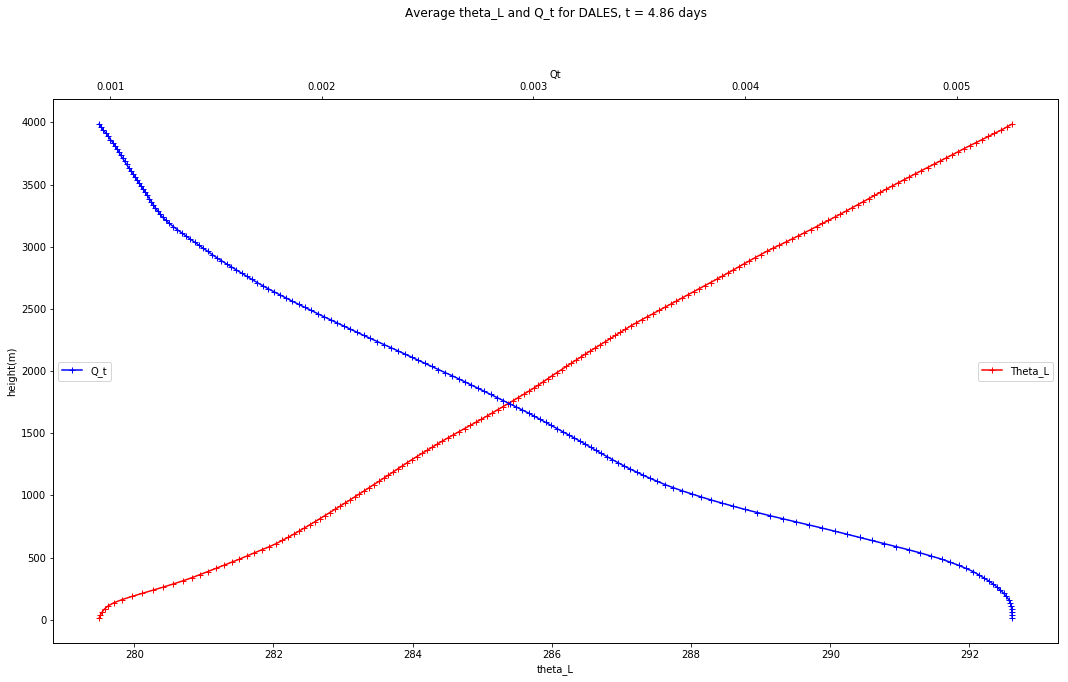

c:\users\bramva~1\envs\worken~1\lib\site-packages\matplotlib\legend.py:634: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x00000280AE824EF0> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
c:\users\bramva~1\envs\worken~1\lib\site-packages\matplotlib\legend.py:634: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x00000280AE2E1B38> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


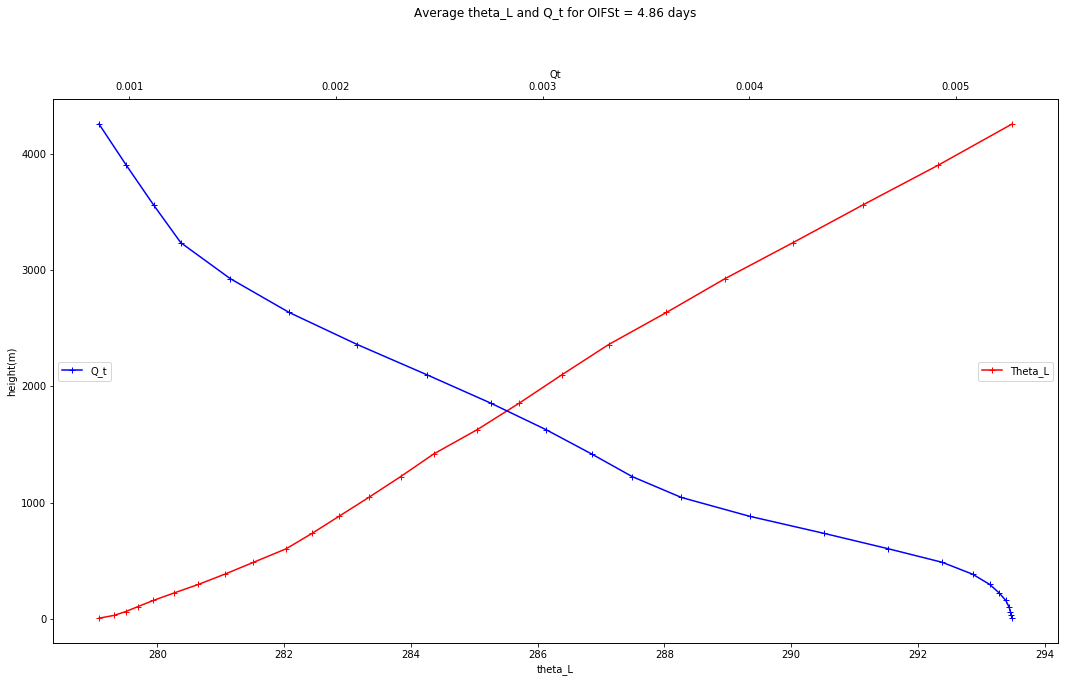

In [90]:
timelevel = 466  # 459, 403, 466
timestring = 't = %0.2f days'%(netcdf['Time'][timelevel]/3600/24)
fig, ax = pyplot.subplots(figsize=(18,10))
ax1, ax2 = two_x_scales(ax, 
                      netcdf['38062/thl'][timelevel][:], 
                      netcdf['38062/qt'][timelevel][:],
                      height_series,
                      height_series,
                      'r', 'b', 'theta_L', 'Qt', 'height(m)', labels=['Theta_L', 'Q_t'])
pyplot.title("Average theta_L and Q_t for DALES, "+timestring, y=1.14)
ax1.legend(loc=5)
ax2.legend(loc=6)
pyplot.show()

fig, ax = pyplot.subplots(figsize=(18,10))
ax1, ax2 = two_x_scales(ax, 
                      netcdf['38062/THL'][timelevel][oifs_range], 
                      netcdf['38062/QT'][timelevel][oifs_range],
                      Height_series[timelevel][oifs_range],
                      Height_series[timelevel][oifs_range],
                      'r', 'b', 'theta_L', 'Qt', 'height(m)', labels=['Theta_L', 'Q_t'])
pyplot.title("Average theta_L and Q_t for OIFS"+timestring, y=1.14)
ax1.legend(loc=5)
ax2.legend(loc=6)
pyplot.show()

c:\users\bramva~1\envs\worken~1\lib\site-packages\matplotlib\legend.py:634: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x00000280AEA83208> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
c:\users\bramva~1\envs\worken~1\lib\site-packages\matplotlib\legend.py:634: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x00000280AE9F7940> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


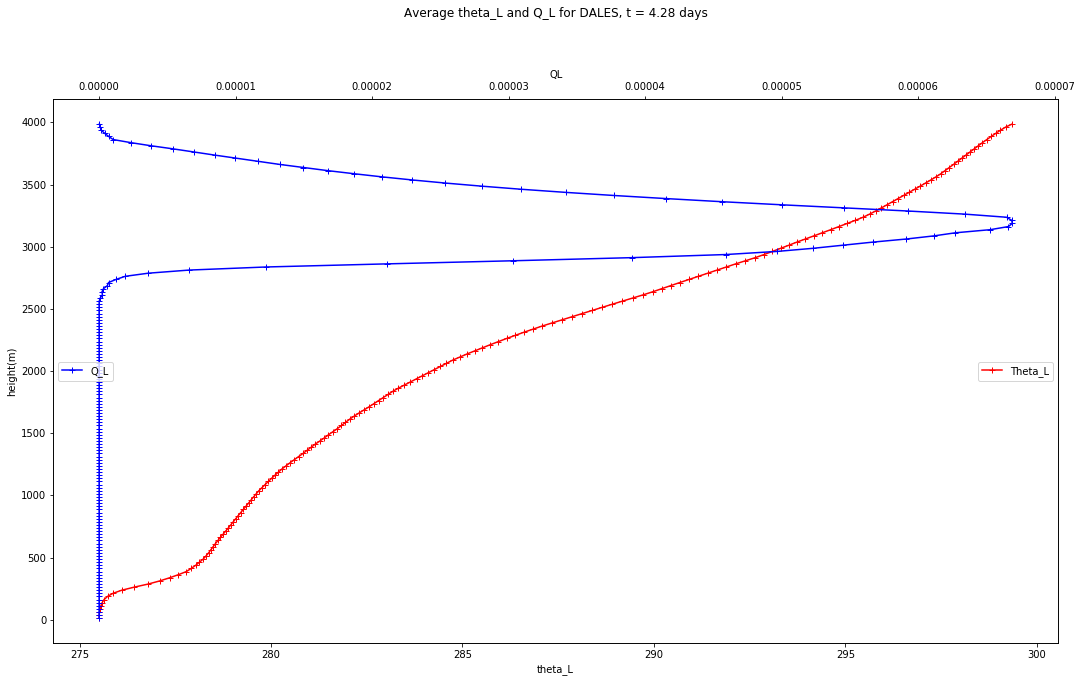

c:\users\bramva~1\envs\worken~1\lib\site-packages\matplotlib\legend.py:634: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x00000280AE8246A0> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
c:\users\bramva~1\envs\worken~1\lib\site-packages\matplotlib\legend.py:634: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x00000280AE98D048> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


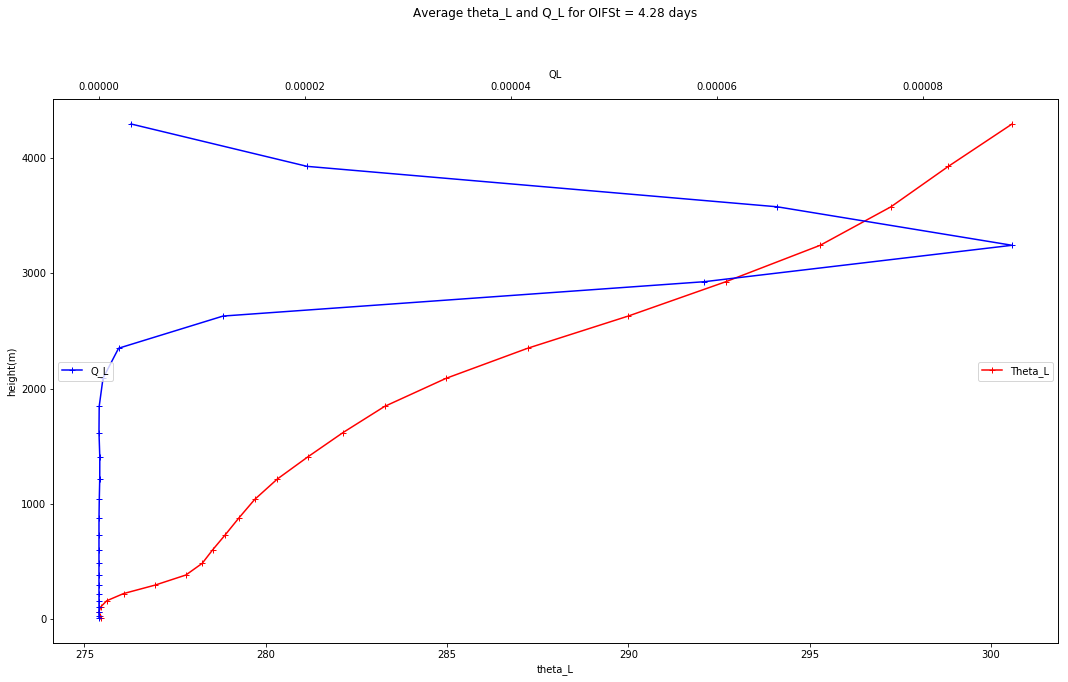

In [91]:
timelevel = 410
timestring = 't = %0.2f days'%(netcdf['Time'][timelevel]/3600/24)
fig, ax = pyplot.subplots(figsize=(18,10))
ax1, ax2 = two_x_scales(ax, 
                      netcdf['38062/thl'][timelevel][:], 
                      netcdf['38062/ql'][timelevel][:],
                      height_series,
                      height_series,
                      'r', 'b', 'theta_L', 'QL', 'height(m)', labels=['Theta_L', 'Q_L'])
pyplot.title("Average theta_L and Q_L for DALES, "+timestring, y=1.14)
ax1.legend(loc=5)
ax2.legend(loc=6)
pyplot.show()

fig, ax = pyplot.subplots(figsize=(18,10))
ax1, ax2 = two_x_scales(ax, 
                      netcdf['38062/THL'][timelevel][oifs_range], 
                      netcdf['38062/QL'][timelevel][oifs_range],
                      Height_series[timelevel][oifs_range],
                      Height_series[timelevel][oifs_range],
                      'r', 'b', 'theta_L', 'QL', 'height(m)', labels=['Theta_L', 'Q_L'])
pyplot.title("Average theta_L and Q_L for OIFS"+timestring, y=1.14)
ax1.legend(loc=5)
ax2.legend(loc=6)
pyplot.show()

c:\users\bramva~1\envs\worken~1\lib\site-packages\matplotlib\legend.py:634: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x0000017EFCE031D0> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
c:\users\bramva~1\envs\worken~1\lib\site-packages\matplotlib\legend.py:634: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x0000017EFC802F98> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


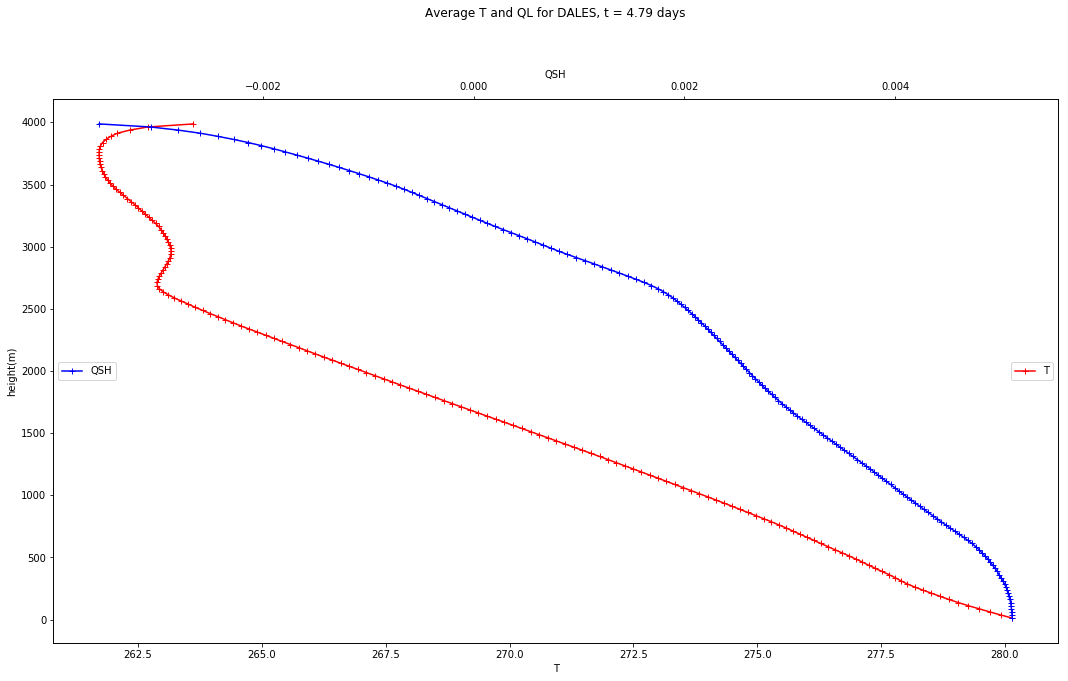

c:\users\bramva~1\envs\worken~1\lib\site-packages\matplotlib\legend.py:634: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x0000017EFE450780> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
c:\users\bramva~1\envs\worken~1\lib\site-packages\matplotlib\legend.py:634: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x0000017EFF9155F8> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


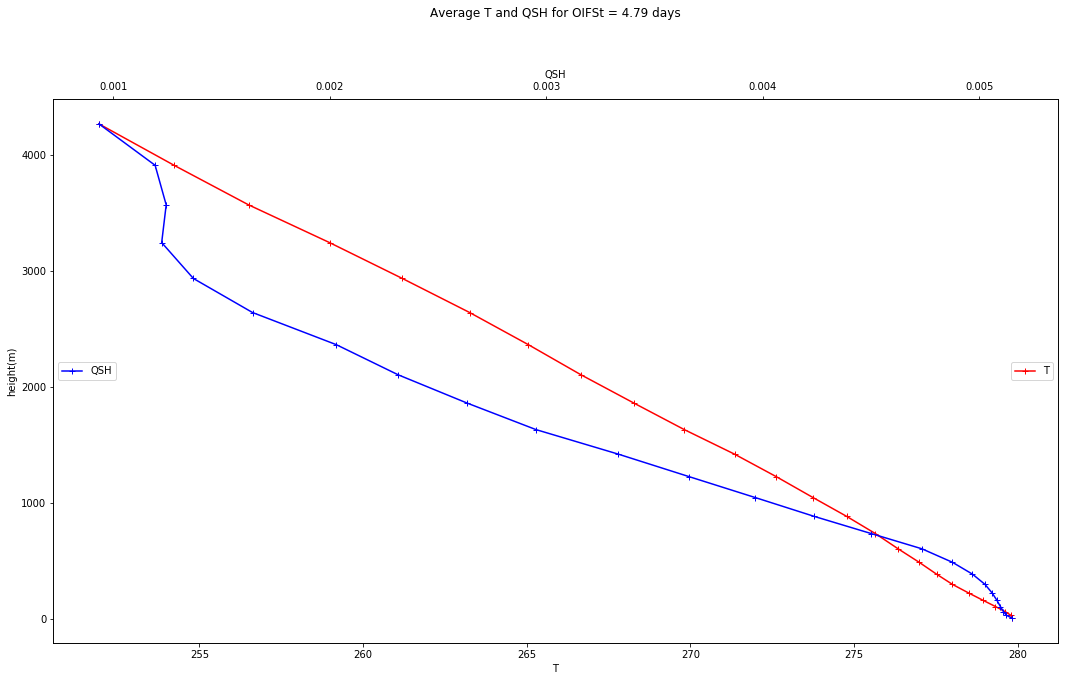

In [531]:
timelevel = 459
timestring = 't = %0.2f days'%(netcdf['Time'][timelevel]/3600/24)
fig, ax = pyplot.subplots(figsize=(18,10))
ax1, ax2 = two_x_scales(ax, 
                      netcdf['38062/t'][timelevel][:], 
                      (netcdf['38062/qt'][timelevel][:]-netcdf['38062/ql'][timelevel][:]),
                      height_series,
                      height_series,
                      'r', 'b', 'T', 'QSH', 'height(m)', labels=['T', 'QSH'])
pyplot.title("Average T and QL for DALES, "+timestring, y=1.14)
ax1.legend(loc=5)
ax2.legend(loc=6)
pyplot.show()

fig, ax = pyplot.subplots(figsize=(18,10))
ax1, ax2 = two_x_scales(ax, 
                      netcdf['38062/T'][timelevel][oifs_range], 
                      netcdf['38062/SH'][timelevel][oifs_range],
                      Height_series[timelevel][oifs_range],
                      Height_series[timelevel][oifs_range],
                      'r', 'b', 'T', 'QSH', 'height(m)', labels=['T', 'QSH'])
pyplot.title("Average T and QSH for OIFS"+timestring, y=1.14)
ax1.legend(loc=5)
ax2.legend(loc=6)
pyplot.show()

c:\users\bramva~1\envs\worken~1\lib\site-packages\matplotlib\legend.py:634: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x0000017EFE6D7358> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
c:\users\bramva~1\envs\worken~1\lib\site-packages\matplotlib\legend.py:634: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x0000017EFF74CCF8> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


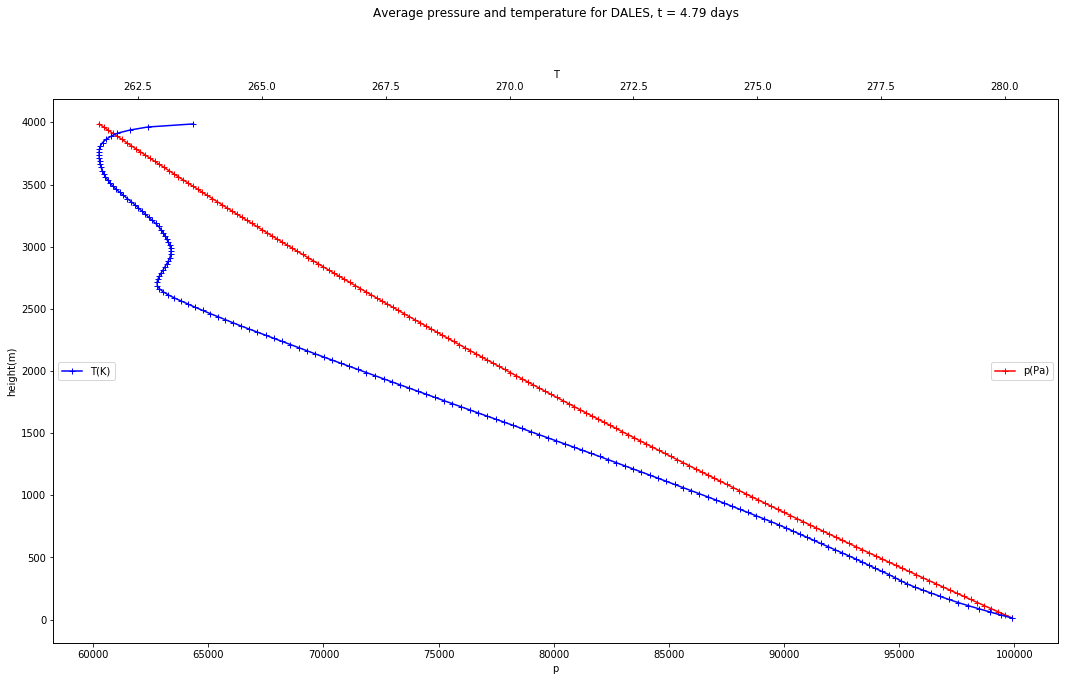

c:\users\bramva~1\envs\worken~1\lib\site-packages\matplotlib\legend.py:634: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x0000017EFC727EB8> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
c:\users\bramva~1\envs\worken~1\lib\site-packages\matplotlib\legend.py:634: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x0000017EFCAD9358> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


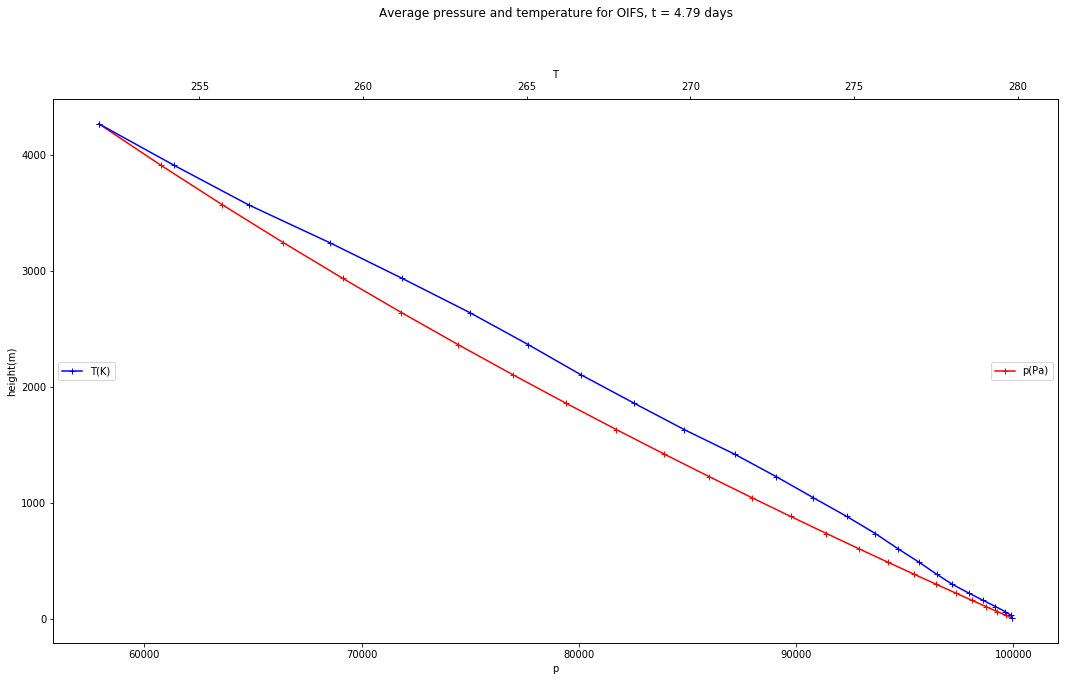

In [521]:
timelevel = 459
timestring = 't = %0.2f days'%(netcdf['Time'][timelevel]/3600/24)
fig, ax = pyplot.subplots(figsize=(18,10))
ax1, ax2 = two_x_scales(ax, 
                      netcdf['38062/presf'][timelevel][:], 
                      netcdf['38062/t'][timelevel][:],
                      height_series,
                      height_series,
                      'r', 'b', 'p', 'T', 'height(m)', labels=['p(Pa)', 'T(K)'])
pyplot.title("Average pressure and temperature for DALES, "+timestring, y=1.14)
ax1.legend(loc=5)
ax2.legend(loc=6)
pyplot.show()

fig, ax = pyplot.subplots(figsize=(18,10))
ax1, ax2 = two_x_scales(ax, 
                      netcdf['38062/Pf'][timelevel][:65:-1], 
                      netcdf['38062/T'][timelevel][:65:-1],
                      Height_series[timelevel][:65:-1],
                      Height_series[timelevel][:65:-1],
                      'r', 'b', 'p', 'T', 'height(m)', labels=['p(Pa)', 'T(K)'])
pyplot.title("Average pressure and temperature for OIFS, "+timestring, y=1.14)
ax1.legend(loc=5)
ax2.legend(loc=6)
pyplot.show()

## Comparison with measurement data

In [537]:
dales_profiles = Dataset("C:/Users\Bram van Es/Dropbox/eScience/data_analysis/data/cabau_750steps/dales/profiles.001.nc", "r") #, format="NETCDF4")

In [538]:
dales_profiles

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: profiles.001.nc
    history: Created on 20170926 at 185929.534
    Source: DALES 4.1
    Author: 
    dimensions(sizes): time(375), zt(160), zm(160)
    variables(dimensions): float32 zt(zt), float32 zm(zm), float32 time(time), float32 rhof(time,zt), float32 rhobf(time,zt), float32 rhobh(time,zm), float32 presh(time,zt), float32 u(time,zt), float32 v(time,zt), float32 thl(time,zt), float32 thv(time,zt), float32 qt(time,zt), float32 ql(time,zt), float32 wthls(time,zm), float32 wthlr(time,zm), float32 wthlt(time,zm), float32 wthvs(time,zm), float32 wthvr(time,zm), float32 wthvt(time,zm), float32 wqts(time,zm), float32 wqtr(time,zm), float32 wqtt(time,zm), float32 wqls(time,zm), float32 wqlr(time,zm), float32 wqlt(time,zm), float32 uws(time,zm), float32 uwr(time,zm), float32 uwt(time,zm), float32 vws(time,zm), float32 vwr(time,zm), float32 vwt(time,zm), float32 w2s(time,zm), float32

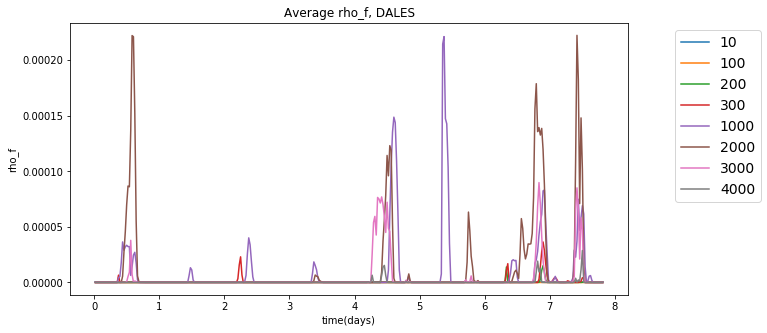

In [621]:
fig, ax = pyplot.subplots(figsize=(10, 5))
Xdata = []
Ydata = []
for k in ref_heights:
    Xdata.append(dales_profiles['time'][:]/3600/24)
    Ydata.append(list(dales_profiles['ql'][0:375, k]))

    
ax1 = n_plots(ax, Xdata, Ydata, 
                   "time(days)", "rho_f", 
                    ["10", "100", "200", "300", "1000", "2000", "3000", "4000"])
#pyplot.xlim([1,8])
#pyplot.ylim([0, 1e-6])
pyplot.title("Average rho_f, DALES")
pyplot.show()

In [92]:
measurements_meteo_meta = Dataset("C:/Users\Bram van Es/Dropbox/eScience/data_analysis/data/cabau_750steps/meas/cesar_tower_meteo_lb1_t10_v1.1_201204.nc", "r") 
measurements_meteo_0413 = Dataset("C:/Users\Bram van Es/Dropbox/eScience/data_analysis/data/cabau_750steps/meas/scm_in.RACMO_Cabauw_2012041312.nc", "r")
measurements_meteo_0413_rds = Dataset("C:/Users\Bram van Es/Dropbox/eScience/data_analysis/data/cabau_750steps/meas/rds_DeBilt_20120413.nc", "r")

measurements_meteo_0414 = Dataset("C:/Users\Bram van Es/Dropbox/eScience/data_analysis/data/cabau_750steps/meas/scm_in.RACMO_Cabauw_2012041412.nc", "r")
measurements_meteo_0414_rds = Dataset("C:/Users\Bram van Es/Dropbox/eScience/data_analysis/data/cabau_750steps/meas/rds_DeBilt_20120414.nc", "r")

measurements_meteo_0415 = Dataset("C:/Users\Bram van Es/Dropbox/eScience/data_analysis/data/cabau_750steps/meas/scm_in.RACMO_Cabauw_2012041512.nc", "r")
measurements_meteo_0415_rds = Dataset("C:/Users\Bram van Es/Dropbox/eScience/data_analysis/data/cabau_750steps/meas/rds_DeBilt_20120415.nc", "r")

measurements_meteo_0416 = Dataset("C:/Users\Bram van Es/Dropbox/eScience/data_analysis/data/cabau_750steps/meas/scm_in.RACMO_Cabauw_2012041612.nc", "r")
measurements_meteo_0416_rds = Dataset("C:/Users\Bram van Es/Dropbox/eScience/data_analysis/data/cabau_750steps/meas/rds_DeBilt_20120416.nc", "r")

measurements_meteo_0417 = Dataset("C:/Users\Bram van Es/Dropbox/eScience/data_analysis/data/cabau_750steps/meas/scm_in.RACMO_Cabauw_2012041712.nc", "r")
measurements_meteo_0417_rds = Dataset("C:/Users\Bram van Es/Dropbox/eScience/data_analysis/data/cabau_750steps/meas/rds_DeBilt_20120417.nc", "r")

measurements_meteo_0418 = Dataset("C:/Users\Bram van Es/Dropbox/eScience/data_analysis/data/cabau_750steps/meas/scm_in.RACMO_Cabauw_2012041812.nc", "r")
measurements_meteo_0418_rds = Dataset("C:/Users\Bram van Es/Dropbox/eScience/data_analysis/data/cabau_750steps/meas/rds_DeBilt_20120418.nc", "r")


In [107]:
measurements_meteo_0413

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: scm_in.RACMO_Cabauw_2012041312.nc
    dataID: scm_in.RACMO_Cabauw_2012041312.nc
    history: Input file for RACMO/ECMWF SCM.
    source: Initial conditions and forcings obtained from RACMO 3D forecast.
    details: 91 model levels (as in IFS CY31R1).
    creator: Roel Neggers, KNMI
    date: Fri Apr 13 22:00:14 CEST 2012
    coor_par_a: [  0.00000000e+00   2.00004005e+00   3.98083210e+00   7.38718605e+00
   1.29083195e+01   2.14136047e+01   3.39528656e+01   5.17465973e+01
   7.61676636e+01   1.08715561e+02   1.50986023e+02   2.04637451e+02
   2.71356445e+02   3.52824463e+02   4.50685791e+02   5.66519287e+02
   7.01813232e+02   8.57945801e+02   1.03616650e+03   1.23758545e+03
   1.46316382e+03   1.71370972e+03   1.98987451e+03   2.29215552e+03
   2.62089844e+03   2.97630225e+03   3.35842578e+03   3.76719604e+03
   4.20241797e+03   4.66377734e+03   5.15085938e+03   5.66315625e+03
 

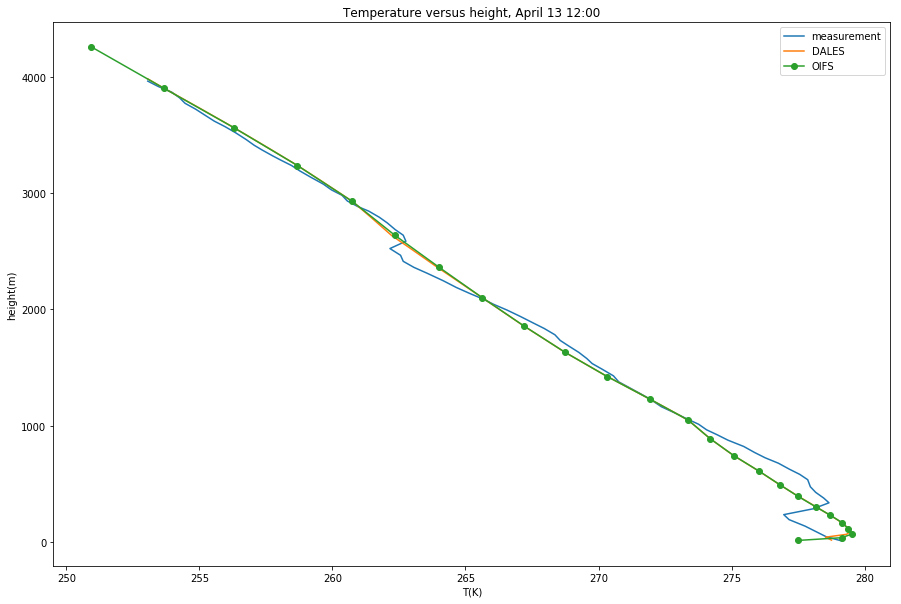

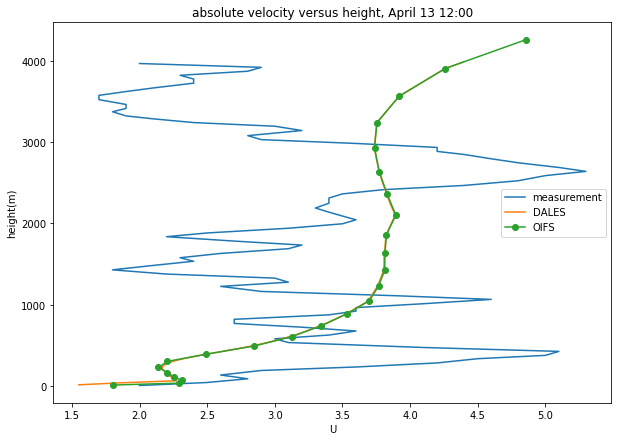

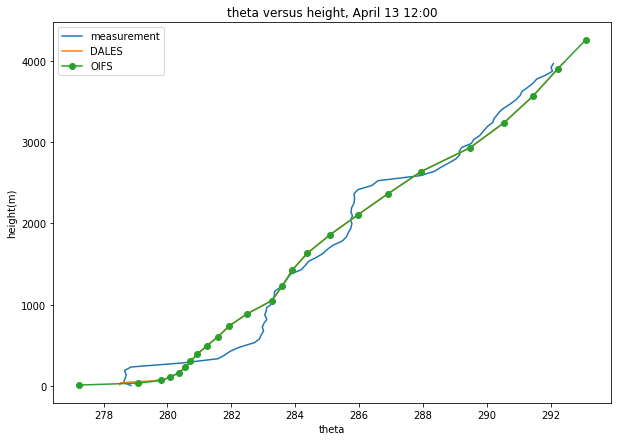

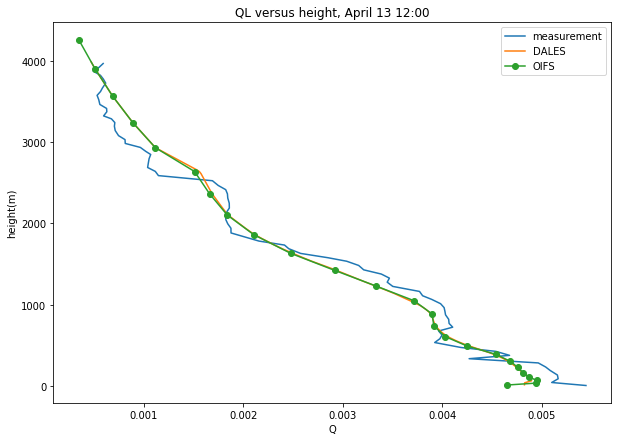

In [93]:
pyplot.figure(figsize=(15,10))
pyplot.plot(measurements_meteo_0413_rds['T'][0,:80], measurements_meteo_0413_rds['height'][0,:80], label = 'measurement')
#pyplot.plot(measurements_meteo_0413_rds['T'][1,:80], measurements_meteo_0413_rds['height'][1,:80], label = 'measurement 2')
pyplot.plot(netcdf['38062/t'][1,:], height_series, label = 'DALES')
pyplot.plot(netcdf['38062/T'][1,:65:-1], Height_series[1,:65:-1], '-o', label = 'OIFS')
pyplot.xlabel("T(K)")
pyplot.ylabel("height(m)")
pyplot.title("Temperature versus height, April 13 12:00")
pyplot.legend()
pyplot.show()

pyplot.figure(figsize=(10,7))
pyplot.plot(measurements_meteo_0413_rds['Vamp'][0,:80], measurements_meteo_0413_rds['height'][0,:80], label = 'measurement')
#pyplot.plot(measurements_meteo_0413_rds['Vamp'][1,:80], measurements_meteo_0413_rds['height'][1,:80], label = 'measurement 2')
pyplot.plot(numpy.sqrt(netcdf['38062/u'][1,:]**2+netcdf['38062/v'][1,:]**2), height_series,label = 'DALES')
pyplot.plot(numpy.sqrt(netcdf['38062/U'][1,:65:-1]**2+netcdf['38062/V'][1,:65:-1]**2), Height_series[1,:65:-1], '-o', label = 'OIFS')
pyplot.xlabel("U")
pyplot.ylabel("height(m)")
pyplot.title("absolute velocity versus height, April 13 12:00")
pyplot.legend()
pyplot.show()

pyplot.figure(figsize=(10,7))
pyplot.plot(measurements_meteo_0413_rds['THETA'][0,:80], measurements_meteo_0413_rds['height'][0,:80], label = 'measurement')
#pyplot.plot(measurements_meteo_0413_rds['THETA'][1,:80], measurements_meteo_0413_rds['height'][1,:80], label = 'measurement 2')
pyplot.plot(netcdf['38062/thl'][1,:], height_series, label = 'DALES')
pyplot.plot(netcdf['38062/THL'][1,:65:-1], Height_series[1,:65:-1], '-o', label = 'OIFS')
pyplot.xlabel("theta")
pyplot.ylabel("height(m)")
pyplot.title("theta versus height, April 13 12:00")
pyplot.legend()
pyplot.show()

pyplot.figure(figsize=(10,7))
pyplot.plot(measurements_meteo_0413_rds['QV'][0,:80], measurements_meteo_0413_rds['height'][0,:80], label = 'measurement')
#pyplot.plot(measurements_meteo_0413_rds['QV'][1,:80], measurements_meteo_0413_rds['height'][1,:80], label = 'measurement 2')
pyplot.plot(netcdf['38062/qt'][1,:]-netcdf['38062/ql'][1,:], height_series,label = 'DALES')
pyplot.plot(netcdf['38062/SH'][1,:65:-1], Height_series[1,:65:-1], '-o', label = 'OIFS')
pyplot.xlabel("Q")
pyplot.ylabel("height(m)")
pyplot.title("QL versus height, April 13 12:00")
pyplot.legend()
pyplot.show()

c:\users\bramva~1\envs\worken~1\lib\site-packages\matplotlib\legend.py:634: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x00000280AE583CF8> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
c:\users\bramva~1\envs\worken~1\lib\site-packages\matplotlib\legend.py:634: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x00000280AE8CC710> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


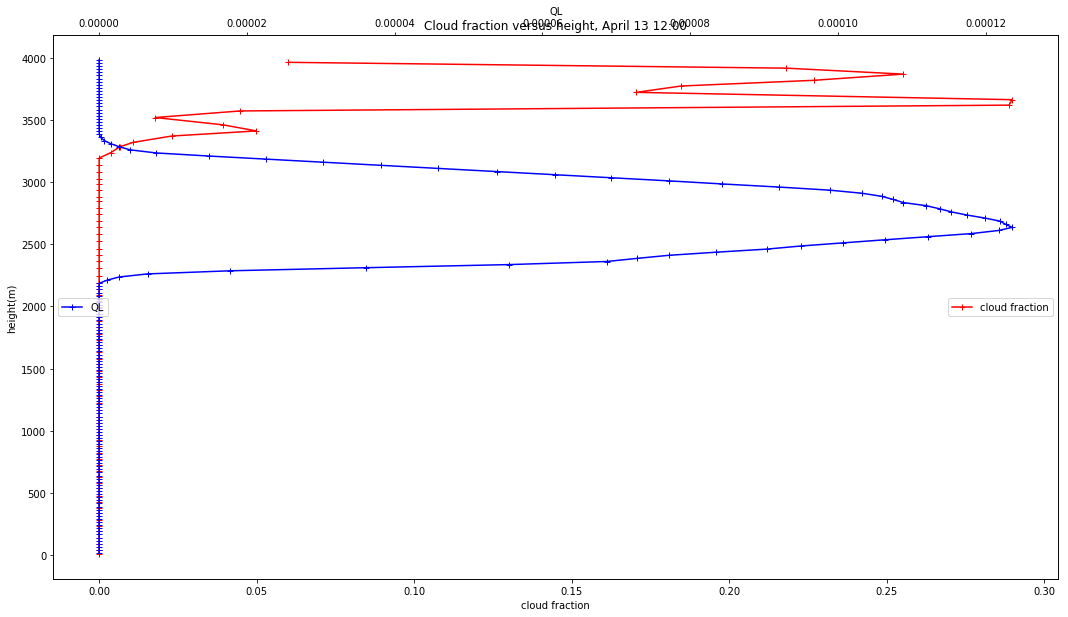

In [106]:
fig, ax = pyplot.subplots(figsize=(18,10))
ax1, ax2 = two_x_scales(ax, 
                      measurements_meteo_0413['cloud_fraction'][0,:80], 
                      netcdf_2['38062/ql'][419,:],
                      measurements_meteo_0413_rds['height'][0,:80],
                      height_series,
                      'r', 'b', 'cloud fraction', 'QL', 'height(m)', labels=['cloud fraction', 'QL'])
pyplot.title("Cloud fraction versus height, April 13 12:00")
ax1.legend(loc=5)
ax2.legend(loc=6)
pyplot.show()